# Identifying Hand-Drawn Digit Images

#### *Adrian R Angkawijaya*
#### *July 2018*

# *Introduction*

This is one of the project competition from Kaggle. The goal of the project is to correctly identify digits from a dataset of ten thousands of handwritten images. 

This is a MNIST ("Modified National Institute of Standards and Technology") dataset, also called the "hello world" dataset of computer vision. The data files contain gray-scale images of hand-drawn digits ranging from 0 to 9. There are a total of 784 pixels with each image having 28 pixels in height and 28 pixels in width. Visit the Kaggle page [here](https://www.kaggle.com/c/digit-recognizer/data) to download and learn more about the data.

The model is build with Convolutional Neural Network (CNN) model of Keras API (Tensorflow backend).

# *Data Preparation*

**Import necessary libraries:**

In [1]:
## Data Analysis
import numpy as np
import pandas as pd

## Data Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

## Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

/Users/adrianromano/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


**Load the datasets and seperate the label column:**

In [2]:
train = pd.read_csv("/Users/adrianromano/Downloads/Kaggle/train.csv")
test = pd.read_csv("/Users/adrianromano/Downloads/Kaggle/test.csv")

label = train["label"]
train.drop(["label"], axis = 1, inplace = True)

**See the shape of the train and test datasets:**

In [3]:
print("Train data dimension: " + str(train.shape))
print("--------------------------------")
print("Test data dimension: " + str(test.shape))

Train data dimension: (42000, 784)
--------------------------------
Test data dimension: (28000, 784)


**Look at the first few rows of the train data:**

In [4]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**See the frequency distribution of the digit values:**

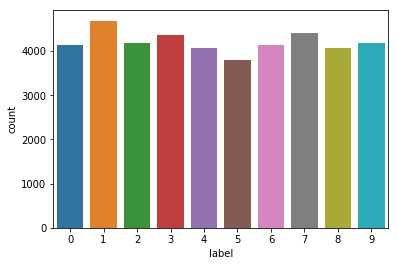

In [5]:
sns.countplot(label)

All the digits seems to have similar counts.

**Check for missing values:**

In [6]:
train_NA = train.isnull().sum()
train_NA = train_NA.drop(train_NA[train_NA == 0].index).sort_values(ascending = False)

print(train_NA)

Series([], dtype: int64)


In [7]:
test_NA = test.isnull().sum()
test_NA = test_NA.drop(test_NA[test_NA == 0].index).sort_values(ascending = False)

print(test_NA)

Series([], dtype: int64)


No missing values present in both train and test sets !

**Convert data types to numeric:**

In [8]:
train = train.values.astype("float32")
test = test.values.astype("float32")

label = label.values.astype("int32")

**These are some examples of the handwritten digit images:**

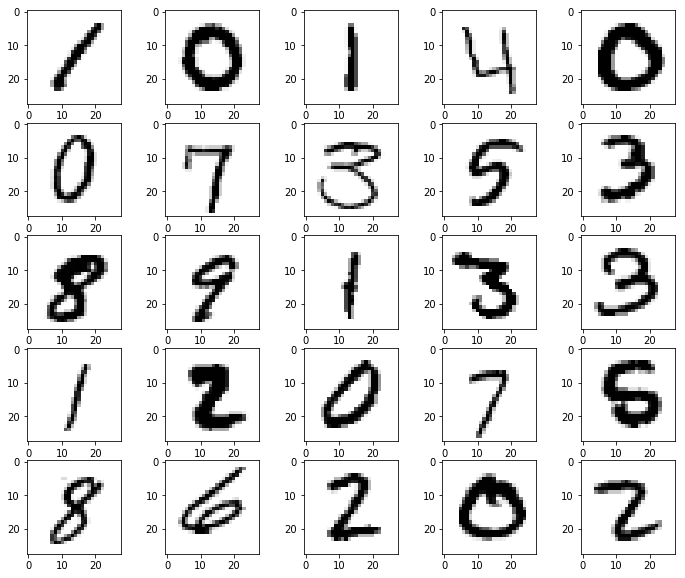

In [9]:
plt.figure(figsize=(12,10))
x, y = 5, 5
for i in range(25):  
    plt.subplot(y, x, i+1)
    plt.imshow(train[i].reshape((28,28)), cmap='binary')
plt.show()

**Normalize the values so that the values are in range of (0..1):**

In [10]:
train = train/255.0
test = test/255.0

**Reshape the image to (28 x 28 x 1) 3D matrices:** 

In [11]:
train = train.reshape(-1, 28, 28,1)
test = test.reshape(-1, 28, 28,1)

**One hot encoding of the label values:**

In [12]:
label = to_categorical(label, num_classes = 10)

# *Model Building*

**Split the training set to 90% for training the model and 10% to test the model:**

In [13]:
X_train, X_val, y_train, y_val = train_test_split(train, label, train_size = 0.9, random_state=88)

**Build the CNN model:**

In [ ]:
## Build with Keras Sequential API by adding one layer at a time
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

## Compile the model by adding optimizer and loss function
model.compile(loss = "categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

**Data Augmentation:** 

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

**Note:** This is a recommended step to prevent overfitting. Data augmentation involves the altering of the train data with small transformations to reproduce variations of handwritten digits. It enables the model to recognize more variations of handwriting and thus improve accuracy.

# *Model Fit and Evaluation*

**Fit the model to the training set:**

In [16]:
epochs = 30 
batch_size = 64

datagen.fit(X_train)

h = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
590/590 [==============================] - 77s 130ms/step - loss: 0.3320 - acc: 0.8937 - val_loss: 0.1119 - val_acc: 0.9652
Epoch 2/30
590/590 [==============================] - 77s 130ms/step - loss: 0.1088 - acc: 0.9656 - val_loss: 0.0534 - val_acc: 0.9824
Epoch 3/30
590/590 [==============================] - 83s 141ms/step - loss: 0.0817 - acc: 0.9745 - val_loss: 0.0344 - val_acc: 0.9898
Epoch 4/30
590/590 [==============================] - 86s 146ms/step - loss: 0.0705 - acc: 0.9784 - val_loss: 0.0439 - val_acc: 0.9867
Epoch 5/30
590/590 [==============================] - 84s 143ms/step - loss: 0.0636 - acc: 0.9811 - val_loss: 0.0286 - val_acc: 0.9902
Epoch 6/30
590/590 [==============================] - 84s 143ms/step - loss: 0.0572 - acc: 0.9824 - val_loss: 0.0284 - val_acc: 0.9912
Epoch 7/30
590/590 [==============================] - 82s 139ms/step - loss: 0.0523 - acc: 0.9842 - val_loss: 0.0266 - val_acc: 0.9914
Epoch 8/30
590/590 [==============================] - 8

The models reaches an accuracy of more than 99% on the validation datasets with 30 epochs. This is a very good model in terms of accuracy !

**Visualize the training and validation difference for accuracy and loss:**

In [ ]:
## Accuracy
plt.plot(h.history['acc'], color ='b', label='Training accuracy')
plt.plot(h.history['val_acc'], color ='r', label='Validation accuracy')
plt.legend(loc='best', shadow=True)
plt.title("Training vs Validation Accuracy")
plt.show()

## Loss
plt.plot(h.history['loss'], color ='b', label='Training loss')
plt.plot(h.history['val_loss'], color ='r', label='Validation loss')
plt.legend(loc='best', shadow=True)
plt.title("Training vs Validation Loss")
plt.show()

Our model looks very well trained. The validation accuracy is close and always higher than the training accuracy during the training. It means that the model generalize well and does not overfit.

**Look at the confusion matrix of the model:**

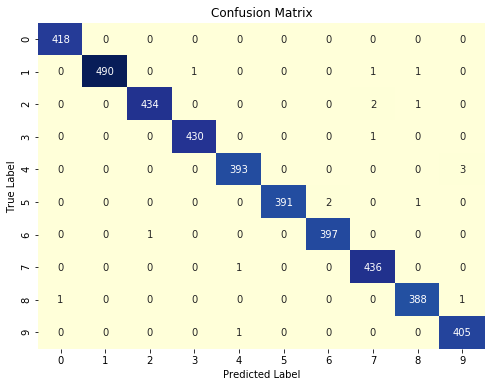

In [18]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
Y_true = np.argmax(y_val, axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize = (8,6))
confusion_matrix = sns.heatmap(confusion_mtx, annot=True, cmap="YlGnBu", fmt='g', cbar = False)
confusion_matrix.set_xlabel("Predicted Label")
confusion_matrix.set_ylabel("True Label")
confusion_matrix.set_title("Confusion Matrix")
plt.show()

There seem to be a few errors present but a large majority of the digits are predicted correctly. It is shown that the highest error is found in differentiating 4 and 9.

**Finally, let's visualize the errors:**

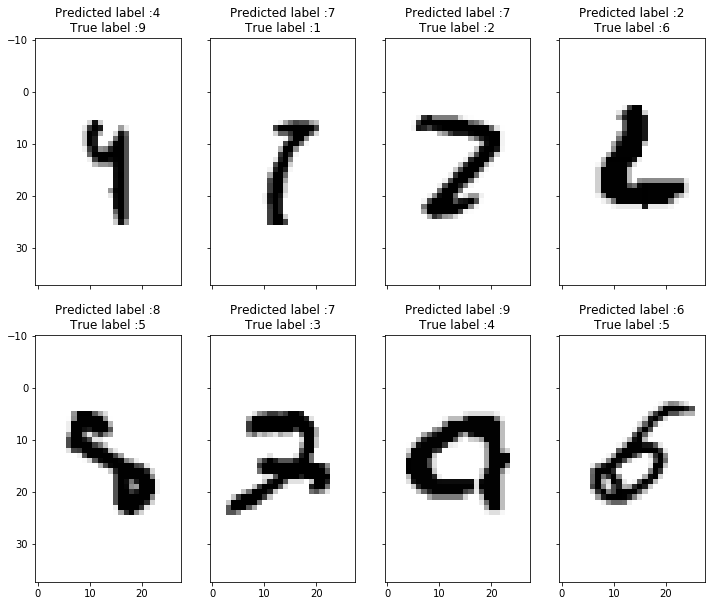

In [19]:
# Errors are difference between predicted labels and true labels that are not 0
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

## Define a function to visualize the errors
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    
    n = 0
    nrows = 2
    ncols = 4
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(12,10))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap='binary')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1


Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

most_important_errors = sorted_delta_errors[-8:]
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

The errors seem understandable. The digits are very misleading and can be easily mistaken by humans as well.

For example, the first one does seem like a four as was predicted but the true digit is a 9. The last digit does look like a 6 as was predicted but the true value is actually a 5.

# *Prediction*

**Use the train model to predict the original test set:**

In [21]:
prediction = model.predict(test)

# select the index with the maximum probability
prediction = np.argmax(prediction,axis = 1)

**Store the prediction in a csv file for the submission to Kaggle:**

In [22]:
df = pd.DataFrame(prediction)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('digit_preds.csv', header=True)